In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BNB.csv',sep=";")
df1=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 3s 94ms/step - loss: 1.9311e-04 - val_loss: 0.1927
Epoch 2/100
13/13 [==============================] - 1s 52ms/step - loss: 9.6280e-05 - val_loss: 0.1266
Epoch 3/100
13/13 [==============================] - 1s 46ms/step - loss: 4.5894e-05 - val_loss: 0.0704
Epoch 4/100
13/13 [==============================] - 1s 50ms/step - loss: 2.1024e-05 - val_loss: 0.0284
Epoch 5/100
13/13 [==============================] - 1s 52ms/step - loss: 8.4072e-06 - val_loss: 0.0066
Epoch 6/100
13/13 [==============================] - 1s 51ms/step - loss: 3.9923e-06 - val_loss: 0.0023
Epoch 7/100
13/13 [==============================] - 1s 53ms/step - loss: 3.8150e-06 - val_loss: 0.0023
Epoch 8/100
13/13 [==============================] - 1s 49ms/step - loss: 4.2740e-06 - val_loss: 0.0024
Epoch 9/100
13/13 [==============================] - 1s 51ms/step - loss: 3.5334e-06 - val_loss: 0.0028
Epoch 10/100
13/13 [==============================] - 1s 56ms/st

13/13 [==============================] - 1s 49ms/step - loss: 2.6510e-06 - val_loss: 0.0016
Epoch 80/100
13/13 [==============================] - 1s 49ms/step - loss: 2.3586e-06 - val_loss: 0.0016
Epoch 81/100
13/13 [==============================] - 1s 44ms/step - loss: 2.2433e-06 - val_loss: 0.0015
Epoch 82/100
13/13 [==============================] - 1s 44ms/step - loss: 2.6985e-06 - val_loss: 0.0015
Epoch 83/100
13/13 [==============================] - 1s 42ms/step - loss: 3.1036e-06 - val_loss: 0.0015
Epoch 84/100
13/13 [==============================] - 1s 43ms/step - loss: 2.5763e-06 - val_loss: 0.0015
Epoch 85/100
13/13 [==============================] - 1s 44ms/step - loss: 2.4893e-06 - val_loss: 0.0016
Epoch 86/100
13/13 [==============================] - 1s 43ms/step - loss: 2.2323e-06 - val_loss: 0.0016
Epoch 87/100
13/13 [==============================] - 1s 48ms/step - loss: 2.3789e-06 - val_loss: 0.0015
Epoch 88/100
13/13 [==============================] - 1s 44ms/step -

In [10]:
# Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

9/9 [==============================] - 0s 8ms/step


In [11]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval)) * 100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 0.05300115402361112
Testing RMSE: 0.21896188786635123
Validation MAPE: 9.977403560070906
Testing MAPE: 29.89586801030619
Validation MAE: 0.04281187320433556
Testing MAE: 0.17580476574101703


In [12]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

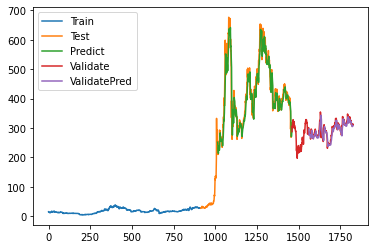

In [13]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()